<a href="https://colab.research.google.com/github/SridharaniKatipally/TechnoHacks_DS/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Load your dataset
data = pd.read_csv('/content/sample_data/kc_house_data.csv')

# Display the first few rows of the dataframe
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Check the data types of each column
data.dtypes

# Check for missing values
data.isnull().sum()

# If 'date' column is present and not needed, drop it
if 'date' in data.columns:
    data = data.drop('date', axis=1)

# Display the first few rows to confirm changes
data.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


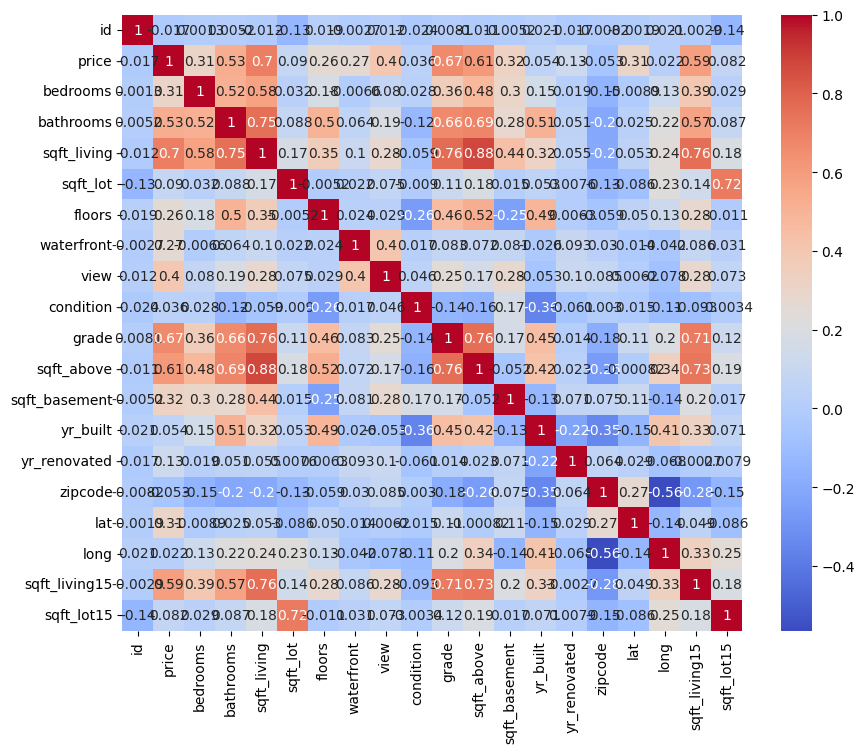

In [ ]:
# Basic statistics of the dataset
data.describe()

# Visualize the correlation between features and the target
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Define features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 45164817780.900444
R^2 Score: 0.7012448735876513


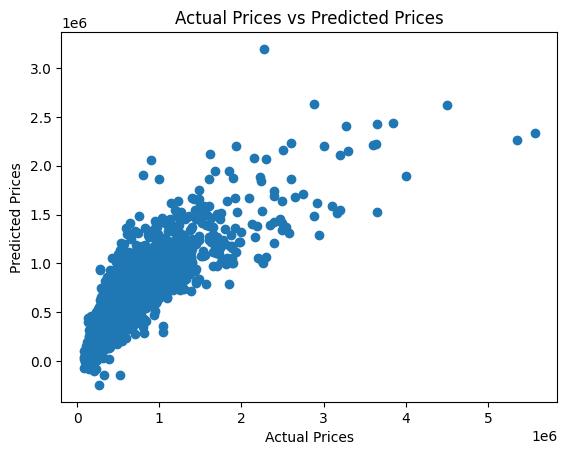

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


In [ ]:
# Example: New house features
new_house = pd.DataFrame({
    'id': [1234567890],
    'bedrooms': [4],
    'bathrooms': [2.5],
    'sqft_living': [3000],
    'sqft_lot': [5000],
    'floors': [2],
    'waterfront': [0],
    'view': [0],
    'condition': [3],
    'grade': [7],
    'sqft_above': [2500],
    'sqft_basement': [500],
    'yr_built': [1995],
    'yr_renovated': [0],
    'zipcode': [98052],
    'lat': [47.6396],
    'long': [-122.128],
    'sqft_living15': [2000],
    'sqft_lot15': [4000]
})

# Ensure the column order matches
new_house = new_house[X.columns]

# Predict the price
predicted_price = model.predict(new_house)
print(f'Predicted Price: ${predicted_price[0]:.2f}')


Predicted Price: $593706.29
